*Please install the Matlab engine first before importing the 'matlab.engine' library!*

*Quick guide:*
- start Matlab as administrator (to do this you might need to right click Matlab and choose "run as administrator")
- copy the following two lines to Matlab and run:

cd (fullfile(matlabroot,'extern','engines','python'))

system('python setup.py install')

*Check out more info [here](https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)*

In [1]:
import pathlib, matlab.engine
import numpy as np
import pandas as pd

In [10]:
models = ['WW11']
scenarios = ['s1', 's3']
quarters = ['2020Q1', '2020Q2', '2001Q1', '2001Q2', '2001Q3', '2001Q4']
engineNumbers = 2
splitTaskBy = 'scenarios'

assert len(eval(splitTaskBy)) >= engineNumbers, f'Why use {engineNumbers} engines when only {len(eval(splitTaskBy))} entries in {splitTaskBy}?'

In [2]:
eng = matlab.engine.start_matlab('-desktop')

In [ ]:
pathModels

In [33]:
with open('WW11.mod', 'r') as file:
    scriptDynare = file.readlines()

In [35]:
scriptDynare[-1] = "estimation(nograph, datafile=data, xls_sheet=data, xls_range=A1:C121, nobs=4, presample=4, order=1, mode_compute=4, mh_replic=5000, mh_nblocks=2, mh_jscale=0.2, mh_drop=0.2, bayesian_irf, irf=20, sub_draws=1000, forecast=5, mode_check) gdp_rgd_obs;"

In [36]:
with open('WW11.mod', 'w') as file:
    file.writelines(scriptDynare)

In [37]:
eng.dynare("WW11.mod", nargout=0)

In [21]:
# eng.dynare("WW11.mod", nargout=0)
# eng.eval("options_.datafile = 'data.csv'", nargout=0)
# eng.eval("options_.mh_replic = 5000", nargout=0)
# eng.eval("options_.forecast = 5", nargout=0)
# eng.eval("options_.order = 1", nargout=0)
# eng.eval("options_.nograph = 1", nargout=0)
# eng.dynare_estimation("", nargout=0)

In [38]:
eng.workspace['oo_'].keys()

dict_keys(['dynare_version', 'exo_simul', 'endo_simul', 'dr', 'exo_steady_state', 'exo_det_steady_state', 'exo_det_simul', 'steady_state', 'prior', 'posterior', 'posterior_mode', 'posterior_std_at_mode', 'MarginalDensity', 'posterior_mean', 'posterior_hpdinf', 'posterior_hpdsup', 'posterior_median', 'posterior_variance', 'posterior_std', 'posterior_deciles', 'posterior_density', 'PosteriorIRF', 'Smoother', 'MeanForecast', 'PointForecast', 'SmoothedVariables', 'UpdatedVariables', 'SmoothedShocks'])

In [41]:
forecastGDP = np.array(eng.workspace['oo_']['PointForecast']['Mean']['gdp_rgd_obs'])

In [45]:
forecastGDP

array([[3.94981398],
       [2.66215162],
       [1.84281129],
       [1.52449096],
       [1.12795077]])

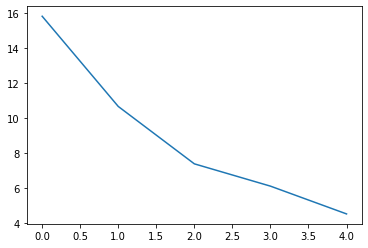

In [44]:
plt.plot(forecastGDP*4)